In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 함수 정의

In [3]:
#시그모이드 정의
def sigmoid(x):
    return 1/(1+ np.exp(-x))
#시그모이드의 미분 정의
def def_sigmoid(x):
    return x * (1 - x)

# 변수 선언 및 행렬 생성

In [7]:
# 입력값과 출력값
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
y = np.array([[0], [1], [1], [0]])
#인풋 생성
X = []
for i in range(0, 4):
    temp = [x1[i], x2[i]]
    X.append(temp)
X = np.array(X)
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

# XOR 구현

### First Weight & bias ###
[w11] : 0.837354 [w21] : 0.128559 

[w21] : 0.128559 [w22] : 0.768939 

[w31] : 0.145408 [w32] : 0.574317 

[bias1] : 0.774729 [bias2] : 0.717399 [bias3] : 0.453556

 #### 결과그래프 ####



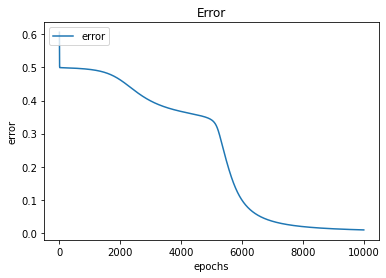

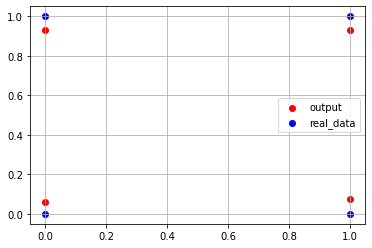

#####Final Output######
 --> [0.06091422] [0.93218317] [0.93218905] [0.07516947]

#####Final Weights & Bias#####

[w11] : 3.411871 [w12] : 3.411322 

[w21] : 7.864695 [w22] : 7.863060 

[w31] : -8.043852 [w32] : 3.411322 

[bias1] : -5.097661 [bias2] : -5.154991 [bias3] : -2.727140


In [31]:
# 학습 횟수와 learning rate 설정
learning_rate = 0.1
epoch = 10000

#에러 및 횟수 저장
epochs = []
errors = []
# 초기 가중치와 편향 설정을 위한 난수 생성
bias1 = np.random.uniform(0, 1)
bias2 = np.random.uniform(0,1)
bias3 = np.random.uniform(0,1)

w11 = np.random.uniform(0, 1)
w21 = np.random.uniform(0, 1)
w12 = np.random.uniform(0, 1)
w22 = np.random.uniform(0, 1)

w31 = np.random.uniform(0, 1)
w32 = np.random.uniform(0, 1)

print("### First Weight & bias ###")
print("[w11] : %f [w21] : %f \n" %(w11, w21))
print("[w21] : %f [w22] : %f \n" %(w21, w22))
print("[w31] : %f [w32] : %f \n" %(w31, w32))
print("[bias1] : %f [bias2] : %f [bias3] : %f" %(bias1, bias2, bias3))

# 행렬 연산을 위해 행렬 생성
bias_to_hidden = np.array([[bias1, bias2]])
bias_to_output = np.array([[bias3]])

weight_to_hidden = np.array([[w11, w21], [w12, w22]])
weight_to_output = np.array([[w31], [w32]])

for i in range(0, epoch):
    epochs.append(i)
    # Forwardpropagation
    z2 = np.dot(X, weight_to_hidden) + bias_to_hidden
    s2 = sigmoid(z2)
    
    z3 = np.dot(s2, weight_to_output) + bias_to_output
    output = sigmoid(z3)
    
    error = (y - output)**2 / 2
    errors.append(np.sum(error))
    
    # Backpropagation
    gradient_bias2 = (output - y) * def_sigmoid(output)
    gradient_w3 = s2.T.dot((output - y) * def_sigmoid(output))
    gradient_bias1 = (((output - y) * def_sigmoid(output)).dot(weight_to_output.T)) * def_sigmoid(s2)
    gradient_w2 = X.T.dot((((output - y) * def_sigmoid(output)).dot(weight_to_output.T)) * def_sigmoid(s2))
    
    # 가중치 및 편향 조정
    bias_to_output = bias_to_output - np.sum(gradient_bias2)
    weight_to_output = weight_to_output - learning_rate * gradient_w3
    bias_to_hidden = bias_to_hidden - np.sum(gradient_bias1)
    weight_to_hidden = weight_to_hidden - learning_rate * gradient_w2
    
print("\n #### 결과그래프 ####\n")
plt.plot(epochs, errors)       
plt.title('Error')
plt.ylabel('error')
plt.xlabel('epochs')
plt.legend(['error', 'epochs'], loc = 'upper left')
plt.show()

plt.scatter(x1, output, color = 'red', label = 'output')
plt.scatter(x1, y, color = 'blue', label = 'real_data')
plt.grid()
plt.legend(loc = 'best')
plt.show()

#최종 가중치 저장 및 결과 값 출력
bias1 = bias_to_hidden[0][0]
bias2 = bias_to_hidden[0][1]
bias3 = bias_to_output[0][0]

w11 = weight_to_hidden[0][0]
w21 = weight_to_hidden[0][1]
w12 = weight_to_hidden[1][0]
w22 = weight_to_hidden[1][1]

w31 = weight_to_output[0][0]
w32 = weight_to_hidden[1][0]
print("#####Final Output######\n -->", *output)
print("\n#####Final Weights & Bias#####\n")
print("[w11] : %f [w12] : %f \n" %(w11, w12))
print("[w21] : %f [w22] : %f \n" %(w21, w22))
print("[w31] : %f [w32] : %f \n" %(w31, w32))
print("[bias1] : %f [bias2] : %f [bias3] : %f" %(bias1, bias2, bias3))